# <center>PROGRAM 7: PANDAS IN PYTHON </center>

---

# University of Anybody Can Learn Datascience - ABCLD

### Requirement

##### Description:	
       Given dataset is a dummy dataset containing infor related to Grades from a PG course at ABCCD University.

##### Attributes:                        
       There are total 5 attributes Sem_enrolled,Tests,Coursera,GroupActivity and	FinalExam.
	   FinalExam is the target variable.
	
##### The recorded values are the average of sub-components: 
         e.g The Tests, coursera and group activity variables are the average of all tests, coursera courses and group activities taken by students. 
    The FinalExam variable is the average of all questions in the final, written exam.

    The Sem_enrolled column is the year in which the student first enrolled at the university and is a crude approximation of the student's age (maturity).

    This particular course permitted students to work in groups for assignments, tutorials and the take-home exam. The groups were self-selected, and varied during the semester.

    Of interest is whether the assignments, tutorials, midterms or take-home exam are a good predictor of the student's performance in the final exam.                                         
    Also, findout whether the sem_enrolled variable show any promise as a prediction variable?

* Data shape:	100 rows and 5 columns                                        
* Missing Values: YES                                     
* Task to be performed: Missing value imputation and Regression.

---

### IMPORTING PACKAGES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style

import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import pickle 

### Academic score of the University of Anybody Can Learn Datascience - ABCLD 

In [2]:
D= pd.read_excel('AcademicScoreDataset.xlsx')
Data =pd.DataFrame(D)
e = Data[(Data['Final'] >= 100) | (Data['Final'] <= 0)]
outlier =pd.DataFrame(e)
outlier

,Sem_enrolled,Tests,Coursera,GroupActivity,Final
33,2,85.42,91.03,NaN,107.78


In [3]:
Data.drop(Data[(Data['Final'] >= 100) | (Data['Final'] <= 0)].index, inplace = True) 

In [4]:
e = Data[(Data['Final'] >= 100) | (Data['Final'] <= 0)]
outlier =pd.DataFrame(e)
outlier

,Sem_enrolled,Tests,Coursera,GroupActivity,Final


### Understanding and examine the given academic dataset to perform the effective 'EDULYTICS'


In [5]:
AcademicScoreDataset= Data
AcademicScoreDataset

,Sem_enrolled,Tests,Coursera,GroupActivity,Final
0,5,95.05,34.09,51.48,52.50
1,1,83.70,100.00,99.07,68.33
2,1,81.22,83.17,63.15,48.89
3,2,91.32,96.06,100.00,80.56
4,1,95.00,93.64,100.00,73.89
...,...,...,...,...,...
95,2,89.94,80.54,93.70,39.72
96,1,95.60,100.00,90.74,87.78
97,2,63.40,76.13,99.81,85.56
98,1,75.35,97.37,72.78,77.22


As per the above table, It clearly shows that this dataset conatins 5 different type of attributes which is related to University Academic. Such like consolidated Test marks, Coursera marks, Group Activity marks and respective Final marks.

In [6]:
AcademicScoreDataset.describe()

,Sem_enrolled,Tests,Coursera,GroupActivity,Final
count,99.000000,96.000000,96.000000,93.000000,93.000000
mean,1.707071,85.081146,88.188646,78.777957,66.520215
std,0.961000,15.038993,14.004583,22.984082,17.278241
min,1.000000,0.000000,34.090000,16.910000,28.060000
25%,1.000000,81.047500,83.170000,63.890000,51.670000
50%,1.000000,90.135000,92.840000,87.590000,65.280000
75%,2.000000,95.012500,99.000000,97.410000,82.220000
max,5.000000,100.000000,100.000000,100.000000,99.170000


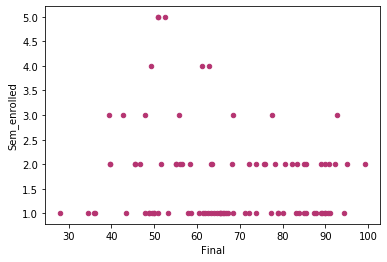

In [7]:
# Weightage of Semester enrollment distribution 
AcademicScoreDataset.plot(x = 'Final', y = 'Sem_enrolled', kind = 'scatter',color="#B53471")

Above plotted graph clearly shows the number of students endrolled on semester bases

Note:- Higher enrollment in 1st sem 2nd higher enrollment in 2nd sem Lower enrollment in 5th sem

## Return a copy of the dataset with missing values filled, replaced or imputed

Since as per our initial analysis, we found that some of the Tests, coursera and group activity fields holding blank or missing data. Which could misleading our EDULYTICS interpretation. 
    
In order to quick fix that we should use missing value imputation technique in Python.
    
Below here, the above dataset carries 3 different missing value imputation technique.

In [8]:
Replace_DataFrame      = AcademicScoreDataset.fillna(0)
ForwardFill_DataFrame  = AcademicScoreDataset.fillna(method = 'ffill')
BackwardFill_DataFrame = AcademicScoreDataset.fillna(method = 'bfill')

### Method 1 - replacing null by zero

* In method one we're making sure that every Tests, coursera and group activity fields NaN values get replaced by ZERO.
* LinearRegression to find the highest accuracy
    
    

In [9]:
Replace_DataFrame[Replace_DataFrame.notnull()]

,Sem_enrolled,Tests,Coursera,GroupActivity,Final
0,5,95.05,34.09,51.48,52.50
1,1,83.70,100.00,99.07,68.33
2,1,81.22,83.17,63.15,48.89
3,2,91.32,96.06,100.00,80.56
4,1,95.00,93.64,100.00,73.89
...,...,...,...,...,...
95,2,89.94,80.54,93.70,39.72
96,1,95.60,100.00,90.74,87.78
97,2,63.40,76.13,99.81,85.56
98,1,75.35,97.37,72.78,77.22


In [10]:
style.use("ggplot")

# Import dataset with student's data
data = Replace_DataFrame

# Select the value we want to predict
predict = "Final"

# List the variables we want to use for our predictions in this model
data = data[[ 'Tests','Coursera','GroupActivity','Final']]
data = shuffle(data)

x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

# Train model multiple times to find the highest accuracy
best = 0
for _ in range(10):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
print("")
print("Highest Accuracy: ", best)

# Load model
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

print("-------------------------")
print('Coefficient:  \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")
print("")
predictions = linear.predict(x_test)

# Print the predictions, the variables we used and the actual final grade
for x in range(len(predictions)):
   print("Predicted Final grade: ", predictions[x])
   print("Data:", x_test[x])
   print("Final grade:", y_test[x])
   print("")

Accuracy: 0.10844137293154033
Accuracy: -0.8145768276011798
Accuracy: -0.035500920649660817
Accuracy: -0.10636161063030936
Accuracy: -0.2891070128025601
Accuracy: 0.03737249875069015
Accuracy: 0.27352549843545637
Accuracy: -0.0664506987530884
Accuracy: -0.0426523918474635
Accuracy: -0.11991328950721325

Highest Accuracy:  0.27352549843545637
-------------------------
Coefficient:  
 [-0.04714049  0.02102377  0.1250936 ]
Intercept: 
 55.36240646550149
-------------------------

Predicted Final grade:  64.9937945378385
Data: [87.93 61.4  99.81]
Final grade: 42.78

Predicted Final grade:  63.0932585980695
Data: [86.29 92.93 78.7 ]
Final grade: 73.89

Predicted Final grade:  58.78461422461769
Data: [81.22 93.68 42.22]
Final grade: 61.39

Predicted Final grade:  66.34394937748662
Data: [ 71.79  88.3  100.  ]
Final grade: 99.17

Predicted Final grade:  65.454519145218
Data: [83.7  88.11 97.41]
Final grade: 65.56

Predicted Final grade:  62.960349783936515
Data: [90.74 57.97 85.19]
Final grad

### Final Interpretation of Method 1

### Tests

The Mean square error is:  472.9745614904693
R squared value is  -0.12413234184058508


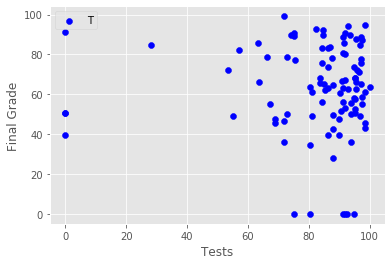

Text(0.5, 1.0, 'Linear Regression')

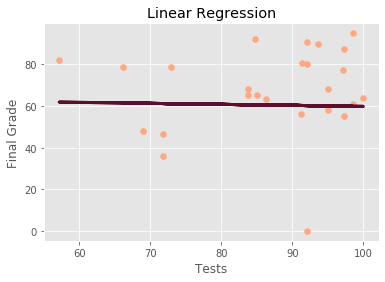

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

X = Replace_DataFrame[['Tests']]
y = Replace_DataFrame["Final"]
train_X, val_X, train_y, val_y = train_test_split(X, y)
model = LinearRegression()
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)
mse = mean_squared_error(val_y, val_predictions)
print("The Mean square error is: ",mse)
print("R squared value is ", metrics.r2_score(val_y,val_predictions))

# Create visualisation of the model
plot = "Tests"
plt.scatter(data[plot], data["Final"],color="blue")
plt.legend(plot)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

plt.scatter(val_X, val_y, color="#FFA781")
plt.plot(val_X, val_predictions, color="#5B0E2D", linewidth=3)
plt.xlabel('Tests')
plt.ylabel('Final Grade')
plt.title('Linear Regression')



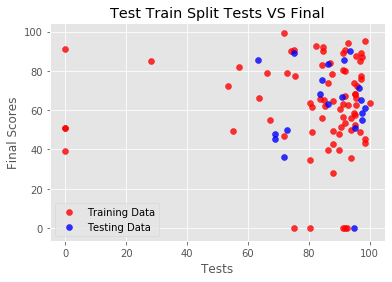

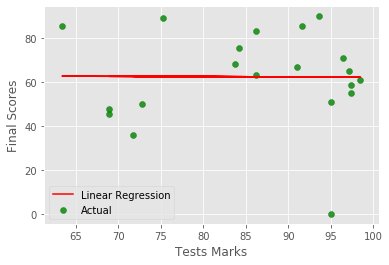

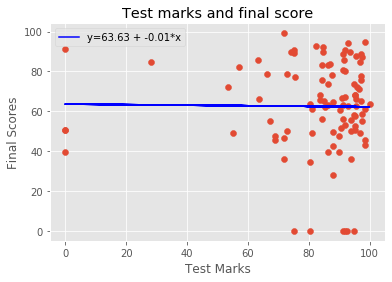

,Actual,Predicted
0,52.50,62.314706
1,68.33,62.472088
2,48.89,62.506476
3,80.56,62.366427
4,73.89,62.315399
...,...,...
95,39.72,62.385562
96,87.78,62.307079
97,85.56,62.753573
98,77.22,62.587871


In [12]:
X = Replace_DataFrame[["Tests"]]
y = Replace_DataFrame["Final"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from matplotlib import pyplot as plt
plt.scatter(X_train,y_train,label='Training Data',color='r',alpha=0.8)
plt.scatter(X_test,y_test,label='Testing Data',color='b',alpha=0.8)
plt.xlabel("Tests")
plt.ylabel("Final Scores")
plt.legend()
plt.title('Test Train Split Tests VS Final')
plt.show()

LR=LinearRegression()
Model1=LR.fit(X_train.values.reshape(-1,1),y_train.values)
prediction=LR.predict(X_test.values.reshape(-1,1))
plt.plot(X_test,prediction,label='Linear Regression',color='r')
plt.scatter(X_test,y_test,label='Actual',color='g',alpha=0.8)
plt.xlabel("Tests Marks")
plt.ylabel("Final Scores")
plt.legend()
plt.show()

reg=LR.fit(X.values.reshape(-1,1),y.values)
reg.coef_
reg.intercept_
reg.score(X.values.reshape(-1,1),y.values)
Y_pred = reg.predict(X.values.reshape(-1,1))
plt.scatter(X, y)
plt.plot(X, Y_pred, color='blue',label = 'y={:.2f} + {:.2f}*x'.format(reg.intercept_,reg.coef_[0]))
plt.xlabel("Test Marks")
plt.ylabel("Final Scores")
plt.title("Test marks and final score")
plt.legend(loc='upper left')
plt.show()
df = pd.DataFrame({'Actual': y, 'Predicted':Y_pred})
df

### Coursera

The Mean square error is:  615.8382748256361
R squared value is  -0.04408503782720241


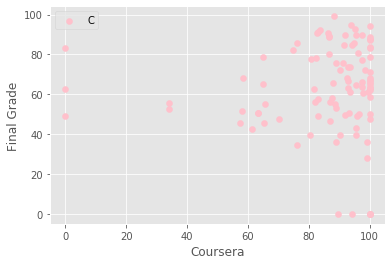

Text(0.5, 1.0, 'Linear Regression')

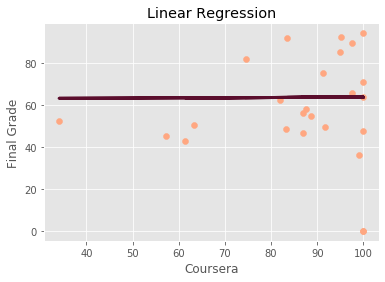

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

X = Replace_DataFrame[['Coursera']]
y = Replace_DataFrame["Final"]
train_X, val_X, train_y, val_y = train_test_split(X, y)
model = LinearRegression()
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)
mse = mean_squared_error(val_y, val_predictions)
print("The Mean square error is: ",mse)
print("R squared value is ", metrics.r2_score(val_y,val_predictions))

# Create visualisation of the model
plot = "Coursera"
plt.scatter(data[plot], data["Final"],color="pink")
plt.legend(plot)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

plt.scatter(val_X, val_y, color="#FFA781")
plt.plot(val_X, val_predictions, color="#5B0E2D", linewidth=3)
plt.xlabel('Coursera')
plt.ylabel('Final Grade')
plt.title('Linear Regression')

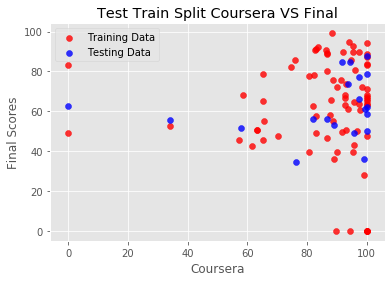

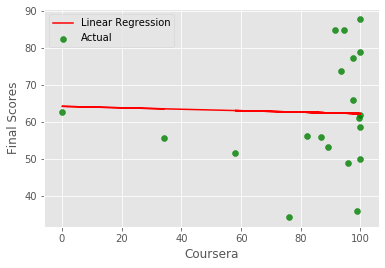

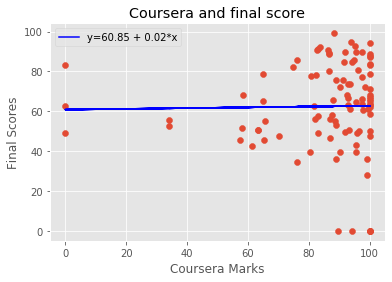

,Actual,Predicted
0,52.50,61.502553
1,68.33,62.766423
2,48.89,62.443696
3,80.56,62.690870
4,73.89,62.644465
...,...,...
95,39.72,62.393264
96,87.78,62.766423
97,85.56,62.308699
98,77.22,62.715991


In [14]:
X = Replace_DataFrame[["Coursera"]]
y = Replace_DataFrame["Final"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from matplotlib import pyplot as plt
plt.scatter(X_train,y_train,label='Training Data',color='r',alpha=0.8)
plt.scatter(X_test,y_test,label='Testing Data',color='b',alpha=0.8)
plt.xlabel("Coursera")
plt.ylabel("Final Scores")
plt.legend()
plt.title('Test Train Split Coursera VS Final')
plt.show()

LR=LinearRegression()
Model1=LR.fit(X_train.values.reshape(-1,1),y_train.values)
prediction=LR.predict(X_test.values.reshape(-1,1))
plt.plot(X_test,prediction,label='Linear Regression',color='r')
plt.scatter(X_test,y_test,label='Actual',color='g',alpha=0.8)
plt.xlabel("Coursera")
plt.ylabel("Final Scores")
plt.legend()
plt.show()

reg=LR.fit(X.values.reshape(-1,1),y.values)
reg.coef_
reg.intercept_
reg.score(X.values.reshape(-1,1),y.values)
Y_pred = reg.predict(X.values.reshape(-1,1))
plt.scatter(X, y)
plt.plot(X, Y_pred, color='blue',label = 'y={:.2f} + {:.2f}*x'.format(reg.intercept_,reg.coef_[0]))
plt.xlabel("Coursera Marks")
plt.ylabel("Final Scores")
plt.title("Coursera and final score")
plt.legend(loc='upper left')
plt.show()
df = pd.DataFrame({'Actual': y, 'Predicted':Y_pred})
df

### GROUP ACTIVITY

The Mean square error is:  712.4523427290154
R squared value is  -0.04099311985552956


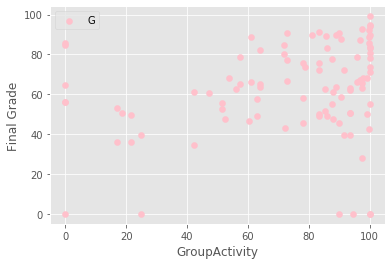

Text(0.5, 1.0, 'Linear Regression')

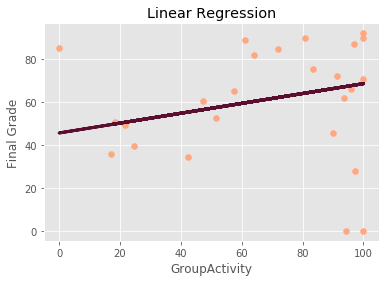

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

X = Replace_DataFrame[['GroupActivity']]
y = Replace_DataFrame["Final"]
train_X, val_X, train_y, val_y = train_test_split(X, y)
model = LinearRegression()
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)
mse = mean_squared_error(val_y, val_predictions)
print("The Mean square error is: ",mse)
print("R squared value is ", metrics.r2_score(val_y,val_predictions))

# Create visualisation of the model
plot = "GroupActivity"
plt.scatter(data[plot], data["Final"],color="pink")
plt.legend(plot)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

plt.scatter(val_X, val_y, color="#FFA781")
plt.plot(val_X, val_predictions, color="#5B0E2D", linewidth=3)
plt.xlabel('GroupActivity')
plt.ylabel('Final Grade')
plt.title('Linear Regression')

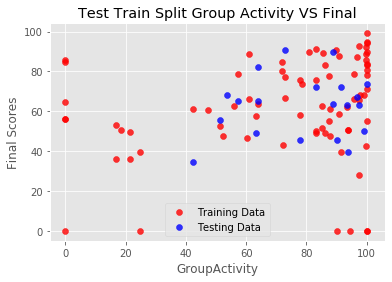

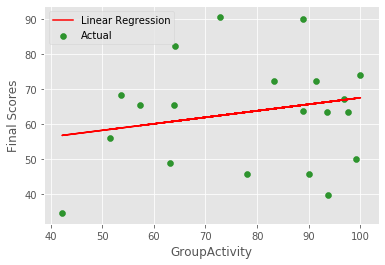

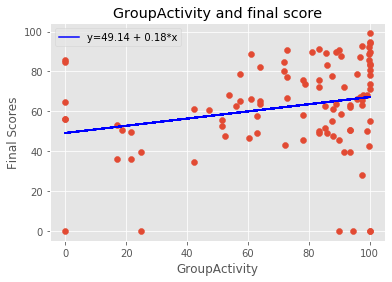

,Actual,Predicted
0,52.50,58.426873
1,68.33,67.009084
2,48.89,60.531399
3,80.56,67.176797
4,73.89,67.176797
...,...,...
95,39.72,66.040677
96,87.78,65.506881
97,85.56,67.142533
98,77.22,62.268039


In [16]:
X = Replace_DataFrame[["GroupActivity"]]
y = Replace_DataFrame["Final"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from matplotlib import pyplot as plt
plt.scatter(X_train,y_train,label='Training Data',color='r',alpha=0.8)
plt.scatter(X_test,y_test,label='Testing Data',color='b',alpha=0.8)
plt.xlabel("GroupActivity")
plt.ylabel("Final Scores")
plt.legend()
plt.title('Test Train Split Group Activity VS Final')
plt.show()

LR=LinearRegression()
Model1=LR.fit(X_train.values.reshape(-1,1),y_train.values)
prediction=LR.predict(X_test.values.reshape(-1,1))
plt.plot(X_test,prediction,label='Linear Regression',color='r')
plt.scatter(X_test,y_test,label='Actual',color='g',alpha=0.8)
plt.xlabel("GroupActivity")
plt.ylabel("Final Scores")
plt.legend()
plt.show()

reg=LR.fit(X.values.reshape(-1,1),y.values)
reg.coef_
reg.intercept_
reg.score(X.values.reshape(-1,1),y.values)
Y_pred = reg.predict(X.values.reshape(-1,1))
plt.scatter(X, y)
plt.plot(X, Y_pred, color='blue',label = 'y={:.2f} + {:.2f}*x'.format(reg.intercept_,reg.coef_[0]))
plt.xlabel("GroupActivity")
plt.ylabel("Final Scores")
plt.title("GroupActivity and final score")
plt.legend(loc='upper left')
plt.show()
df = pd.DataFrame({'Actual': y, 'Predicted':Y_pred})
df

### Method 2A - forward fill imputation

* In method two - forward fill imputation, we're filling our NaN value by propagated last valid entry from respective columns Tests, coursera and group activity.
* NOTE: For the very 1st row, NaN values remains unchange.

In [17]:
ForwardFill_DataFrame[ForwardFill_DataFrame.notnull()]

,Sem_enrolled,Tests,Coursera,GroupActivity,Final
0,5,95.05,34.09,51.48,52.50
1,1,83.70,100.00,99.07,68.33
2,1,81.22,83.17,63.15,48.89
3,2,91.32,96.06,100.00,80.56
4,1,95.00,93.64,100.00,73.89
...,...,...,...,...,...
95,2,89.94,80.54,93.70,39.72
96,1,95.60,100.00,90.74,87.78
97,2,63.40,76.13,99.81,85.56
98,1,75.35,97.37,72.78,77.22


In [18]:
style.use("ggplot")

# Import dataset with student's data
data = ForwardFill_DataFrame

# Select the value we want to predict
predict = "Final"

# List the variables we want to use for our predictions in this model
data = data[[ 'Tests','Coursera','GroupActivity','Final']]
data = shuffle(data)

x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

# Train model multiple times to find the highest accuracy
best = 0
for _ in range(10):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
print("Highest Accuracy:", best)

# Load model
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

predictions = linear.predict(x_test)

# Print the predictions, the variables we used and the actual final grade
for x in range(len(predictions)):
   print("Predicted Final grade: ", predictions[x])
   print("Data:", x_test[x])
   print("Final grade:", y_test[x])
   print("")

Accuracy: -0.34328924654630777
Accuracy: 0.12180894057740321
Accuracy: -0.6526758225862714
Accuracy: 0.2800888934575929
Accuracy: 0.07136039449723242
Accuracy: 0.06072737905147774
Accuracy: -0.1458422859151316
Accuracy: 0.3003968607572872
Accuracy: 0.12199351728877195
Accuracy: -0.24286555657181652
Highest Accuracy: 0.3003968607572872
-------------------------
Coefficient: 
 [-0.04395735  0.14703592  0.2506458 ]
Intercept: 
 37.26760796451037
-------------------------
Predicted Final grade:  59.506667366833895
Data: [90.33 97.76 47.22]
Final grade: 60.56

Predicted Final grade:  70.98714585612828
Data: [ 68.95 100.    87.96]
Final grade: 47.78

Predicted Final grade:  61.313991421253924
Data: [91.32 86.67 61.11]
Final grade: 88.89

Predicted Final grade:  64.49006446943173
Data: [96.73 91.58 71.85]
Final grade: 85.0

Predicted Final grade:  66.76154067730636
Data: [75.35 63.39 93.7 ]
Final grade: 50.83

Predicted Final grade:  62.50943948908162
Data: [91.62 94.89 61.11]
Final grade: 85

### Final Interpretation of Method 2A

### TESTS

The Mean square error is:  281.90008865669114
R squared value is  -0.12009596257898103


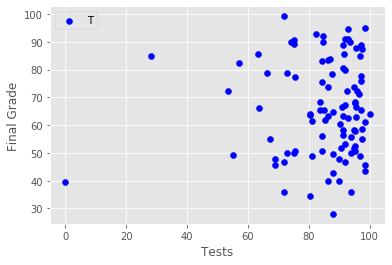

Text(0.5, 1.0, 'Linear Regression')

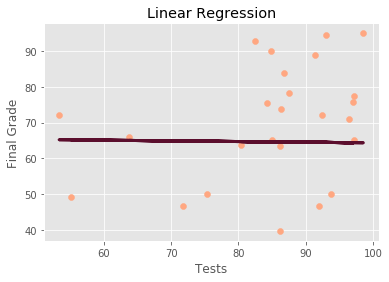

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

X = ForwardFill_DataFrame[['Tests']]
y = ForwardFill_DataFrame["Final"]
train_X, val_X, train_y, val_y = train_test_split(X, y)
model = LinearRegression()
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)
mse = mean_squared_error(val_y, val_predictions)
print("The Mean square error is: ",mse)
print("R squared value is ", metrics.r2_score(val_y,val_predictions))

# Create visualisation of the model
plot = "Tests"
plt.scatter(data[plot], data["Final"],color="blue")
plt.legend(plot)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

plt.scatter(val_X, val_y, color="#FFA781")
plt.plot(val_X, val_predictions, color="#5B0E2D", linewidth=3)
plt.xlabel('Tests')
plt.ylabel('Final Grade')
plt.title('Linear Regression')

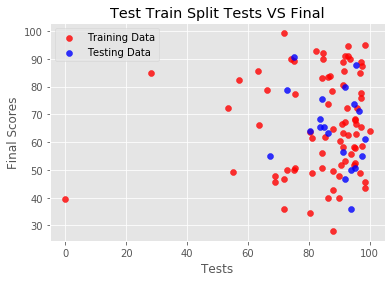

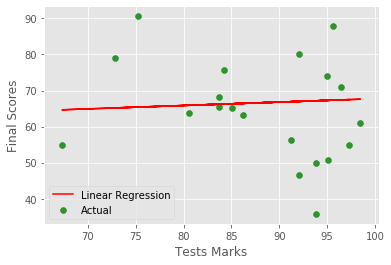

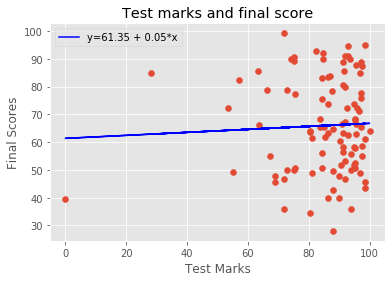

,Actual,Predicted
0,52.50,66.491673
1,68.33,65.877831
2,48.89,65.743706
3,80.56,66.289944
4,73.89,66.488969
...,...,...
95,39.72,66.215309
96,87.78,66.521419
97,85.56,64.779946
98,77.22,65.426238


In [20]:
X = ForwardFill_DataFrame[["Tests"]]
y = ForwardFill_DataFrame["Final"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from matplotlib import pyplot as plt
plt.scatter(X_train,y_train,label='Training Data',color='r',alpha=0.8)
plt.scatter(X_test,y_test,label='Testing Data',color='b',alpha=0.8)
plt.xlabel("Tests")
plt.ylabel("Final Scores")
plt.legend()
plt.title('Test Train Split Tests VS Final')
plt.show()

LR=LinearRegression()
Model1=LR.fit(X_train.values.reshape(-1,1),y_train.values)
prediction=LR.predict(X_test.values.reshape(-1,1))
plt.plot(X_test,prediction,label='Linear Regression',color='r')
plt.scatter(X_test,y_test,label='Actual',color='g',alpha=0.8)
plt.xlabel("Tests Marks")
plt.ylabel("Final Scores")
plt.legend()
plt.show()

reg=LR.fit(X.values.reshape(-1,1),y.values)
reg.coef_
reg.intercept_
reg.score(X.values.reshape(-1,1),y.values)
Y_pred = reg.predict(X.values.reshape(-1,1))
plt.scatter(X, y)
plt.plot(X, Y_pred, color='blue',label = 'y={:.2f} + {:.2f}*x'.format(reg.intercept_,reg.coef_[0]))
plt.xlabel("Test Marks")
plt.ylabel("Final Scores")
plt.title("Test marks and final score")
plt.legend(loc='upper left')
plt.show()
df = pd.DataFrame({'Actual': y, 'Predicted':Y_pred})
df

### COURSERA

The Mean square error is:  391.3942981829368
R squared value is  -0.01064632084789463


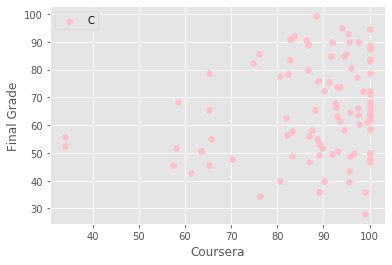

Text(0.5, 1.0, 'Linear Regression')

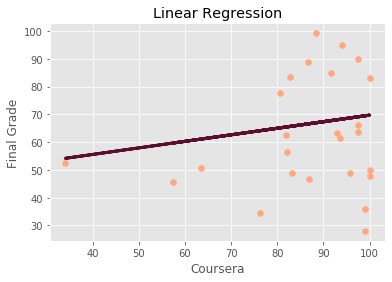

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = ForwardFill_DataFrame[['Coursera']]
y = ForwardFill_DataFrame["Final"]
train_X, val_X, train_y, val_y = train_test_split(X, y)
model = LinearRegression()
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)
mse = mean_squared_error(val_y, val_predictions)
print("The Mean square error is: ",mse)
print("R squared value is ", metrics.r2_score(val_y,val_predictions))

# Create visualisation of the model
plot = "Coursera"
plt.scatter(data[plot], data["Final"],color="pink")
plt.legend(plot)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

plt.scatter(val_X, val_y, color="#FFA781")
plt.plot(val_X, val_predictions, color="#5B0E2D", linewidth=3)
plt.xlabel('Coursera')
plt.ylabel('Final Grade')
plt.title('Linear Regression')

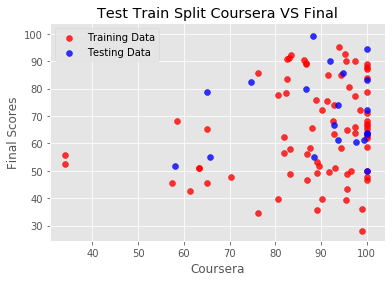

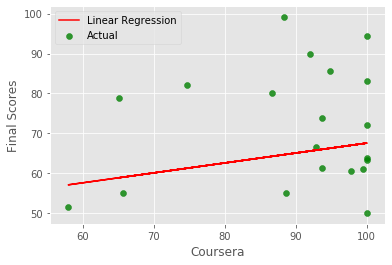

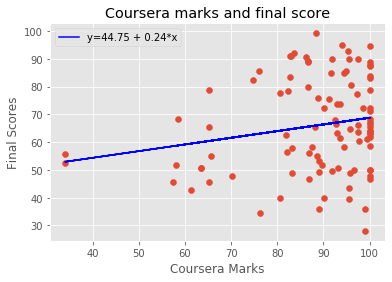

,Actual,Predicted
0,52.50,52.941327
1,68.33,68.770304
2,48.89,64.728403
3,80.56,67.824072
4,73.89,67.242883
...,...,...
95,39.72,64.096781
96,87.78,68.770304
97,85.56,63.037673
98,77.22,68.138682


In [22]:
X = ForwardFill_DataFrame[["Coursera"]]
y = ForwardFill_DataFrame["Final"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from matplotlib import pyplot as plt
plt.scatter(X_train,y_train,label='Training Data',color='r',alpha=0.8)
plt.scatter(X_test,y_test,label='Testing Data',color='b',alpha=0.8)
plt.xlabel("Coursera")
plt.ylabel("Final Scores")
plt.legend()
plt.title('Test Train Split Coursera VS Final')
plt.show()

LR=LinearRegression()
Model1=LR.fit(X_train.values.reshape(-1,1),y_train.values)
prediction=LR.predict(X_test.values.reshape(-1,1))
plt.plot(X_test,prediction,label='Linear Regression',color='r')
plt.scatter(X_test,y_test,label='Actual',color='g',alpha=0.8)
plt.xlabel("Coursera")
plt.ylabel("Final Scores")
plt.legend()
plt.show()


reg=LR.fit(X.values.reshape(-1,1),y.values)
reg.coef_
reg.intercept_
reg.score(X.values.reshape(-1,1),y.values)
Y_pred = reg.predict(X.values.reshape(-1,1))
plt.scatter(X, y)
plt.plot(X, Y_pred, color='blue',label = 'y={:.2f} + {:.2f}*x'.format(reg.intercept_,reg.coef_[0]))
plt.xlabel("Coursera Marks")
plt.ylabel("Final Scores")
plt.title("Coursera marks and final score")
plt.legend(loc='upper left')
plt.show()
df = pd.DataFrame({'Actual': y, 'Predicted':Y_pred})
df

### GROUP ACTIVITY

The Mean square error is:  248.6646873887786
R squared value is  0.1663284707405156


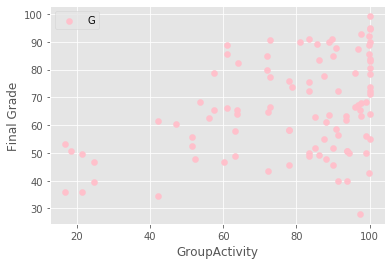

Text(0.5, 1.0, 'Linear Regression')

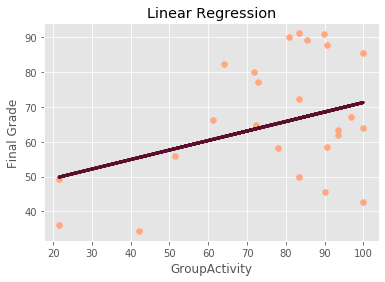

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

X = ForwardFill_DataFrame[['GroupActivity']]
y = ForwardFill_DataFrame["Final"]
train_X, val_X, train_y, val_y = train_test_split(X, y)
model = LinearRegression()
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)
mse = mean_squared_error(val_y, val_predictions)
print("The Mean square error is: ",mse)
print("R squared value is ", metrics.r2_score(val_y,val_predictions))

# Create visualisation of the model
plot = "GroupActivity"
plt.scatter(data[plot], data["Final"],color="pink")
plt.legend(plot)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

plt.scatter(val_X, val_y, color="#FFA781")
plt.plot(val_X, val_predictions, color="#5B0E2D", linewidth=3)
plt.xlabel('GroupActivity')
plt.ylabel('Final Grade')
plt.title('Linear Regression')

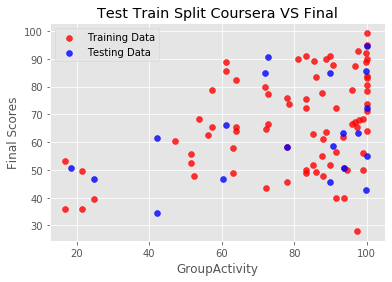

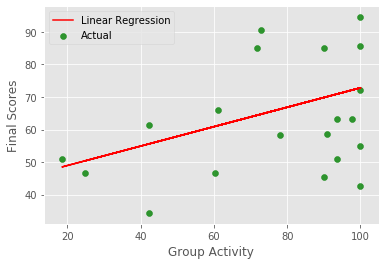

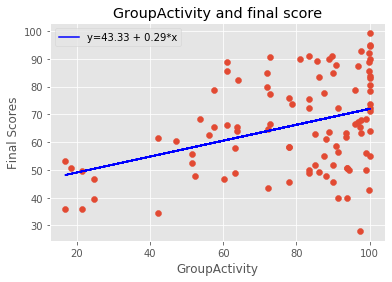

,Actual,Predicted
0,52.50,58.074958
1,68.33,71.709155
2,48.89,61.418330
3,80.56,71.975594
4,73.89,71.975594
...,...,...
95,39.72,70.170688
96,87.78,69.322669
97,85.56,71.921160
98,77.22,64.177257


In [24]:
X = ForwardFill_DataFrame[["GroupActivity"]]
y = ForwardFill_DataFrame["Final"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from matplotlib import pyplot as plt
plt.scatter(X_train,y_train,label='Training Data',color='r',alpha=0.8)
plt.scatter(X_test,y_test,label='Testing Data',color='b',alpha=0.8)
plt.xlabel("GroupActivity")
plt.ylabel("Final Scores")
plt.legend()
plt.title('Test Train Split Coursera VS Final')
plt.show()

LR=LinearRegression()
Model1=LR.fit(X_train.values.reshape(-1,1),y_train.values)
prediction=LR.predict(X_test.values.reshape(-1,1))
plt.plot(X_test,prediction,label='Linear Regression',color='r')
plt.scatter(X_test,y_test,label='Actual',color='g',alpha=0.8)
plt.xlabel("Group Activity")
plt.ylabel("Final Scores")
plt.legend()
plt.show()

reg=LR.fit(X.values.reshape(-1,1),y.values)
reg.coef_
reg.intercept_
reg.score(X.values.reshape(-1,1),y.values)
Y_pred = reg.predict(X.values.reshape(-1,1))
plt.scatter(X, y)
plt.plot(X, Y_pred, color='blue',label = 'y={:.2f} + {:.2f}*x'.format(reg.intercept_,reg.coef_[0]))
plt.xlabel("GroupActivity")
plt.ylabel("Final Scores")
plt.title("GroupActivity and final score")
plt.legend(loc='upper left')
plt.show()
df = pd.DataFrame({'Actual': y, 'Predicted':Y_pred})
df

### Method 2B - backward fill imputation
        
* In method three - backward fill imputation, we're filling our NaN value by propagated next valid entry from respective columns Tests, coursera and group activity.
        
* NOTE: 
      - For the last row, NaN values remains unchange.
      - In order to handle that, we're using the convenience methods, 
            -> dropna() (which removes NA values)
        

In [25]:
BackwardFill_DataFrame[BackwardFill_DataFrame.notnull()]

,Sem_enrolled,Tests,Coursera,GroupActivity,Final
0,5,95.05,34.09,51.48,52.50
1,1,83.70,100.00,99.07,68.33
2,1,81.22,83.17,63.15,48.89
3,2,91.32,96.06,100.00,80.56
4,1,95.00,93.64,100.00,73.89
...,...,...,...,...,...
95,2,89.94,80.54,93.70,39.72
96,1,95.60,100.00,90.74,87.78
97,2,63.40,76.13,99.81,85.56
98,1,75.35,97.37,72.78,77.22


In [26]:
# calculating correlation
BackwardFill_DataFrame = BackwardFill_DataFrame.dropna()

In [27]:
style.use("ggplot")

# Import dataset with student's data
data = BackwardFill_DataFrame

# Select the value we want to predict
predict = "Final"

# List the variables we want to use for our predictions in this model
data = data[[ 'Tests','Coursera','GroupActivity','Final']]
data = shuffle(data)

x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

# Train model multiple times to find the highest accuracy
best = 0
for _ in range(50):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
print("Highest Accuracy:", best/2)

# Load model
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

predictions = linear.predict(x_test)

# Print the predictions, the variables we used and the actual final grade
for x in range(len(predictions)):
   print("Predicted Final grade: ", predictions[x])
   print("Data:", x_test[x])
   print("Final grade:", y_test[x])
   print("")


Accuracy: -0.1266368691011297
Accuracy: -0.2751628671870958
Accuracy: 0.17958398904099349
Accuracy: 0.06829264054238082
Accuracy: -0.002547601431938107
Accuracy: 0.062455694232286585
Accuracy: -0.006700355213627773
Accuracy: 0.15483487506388083
Accuracy: 0.3692663973669711
Accuracy: -0.22693086491992798
Accuracy: 0.27757113131986577
Accuracy: -0.4584687784955308
Accuracy: -0.025750351127683535
Accuracy: 0.1667038434769047
Accuracy: -1.5433501496472037
Accuracy: 0.15953401100484166
Accuracy: -0.3562913101011487
Accuracy: -0.024465060116457993
Accuracy: -0.21120472229598963
Accuracy: 0.1636743764902815
Accuracy: -0.04034440350607249
Accuracy: -0.2899427536178538
Accuracy: 0.16134207549378843
Accuracy: -0.011233674824955298
Accuracy: -0.580013243107377
Accuracy: 0.04037823653755568
Accuracy: 0.06666392653649256
Accuracy: 0.00271305126933552
Accuracy: 0.09278924446814074
Accuracy: 0.02907844644062363
Accuracy: 0.31746043454531636
Accuracy: 0.09776555208028537
Accuracy: 0.39302386020024793


### Final Interpretation of Method 2B

### TESTS

The Mean square error is:  463.4909992340656
R squared value is  -0.22554687459059242


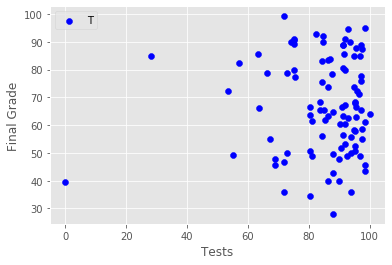

Text(0.5, 1.0, 'Linear Regression')

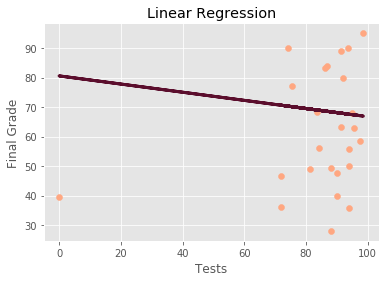

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

X = BackwardFill_DataFrame[['Tests']]
y = BackwardFill_DataFrame["Final"]
train_X, val_X, train_y, val_y = train_test_split(X, y)
model = LinearRegression()
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)
mse = mean_squared_error(val_y, val_predictions)
print("The Mean square error is: ",mse)
print("R squared value is ", metrics.r2_score(val_y,val_predictions))

# Create visualisation of the model
plot = "Tests"
plt.scatter(data[plot], data["Final"],color="blue")
plt.legend(plot)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

plt.scatter(val_X, val_y, color="#FFA781")
plt.plot(val_X, val_predictions, color="#5B0E2D", linewidth=3)
plt.xlabel('Tests')
plt.ylabel('Final Grade')
plt.title('Linear Regression')

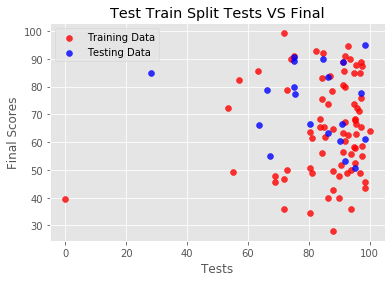

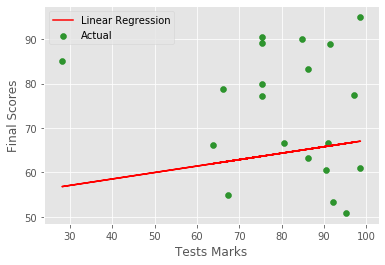

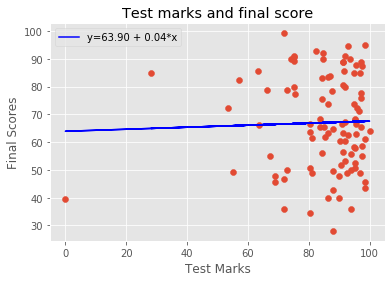

,Actual,Predicted
0,52.50,67.363851
1,68.33,66.950592
2,48.89,66.860293
3,80.56,67.228040
4,73.89,67.362030
...,...,...
94,61.94,67.010305
95,39.72,67.177793
96,87.78,67.383876
97,85.56,66.211458


In [29]:
X = BackwardFill_DataFrame[["Tests"]]
y = BackwardFill_DataFrame["Final"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from matplotlib import pyplot as plt
plt.scatter(X_train,y_train,label='Training Data',color='r',alpha=0.8)
plt.scatter(X_test,y_test,label='Testing Data',color='b',alpha=0.8)
plt.xlabel("Tests")
plt.ylabel("Final Scores")
plt.legend()
plt.title('Test Train Split Tests VS Final')
plt.show()

LR=LinearRegression()
Model1=LR.fit(X_train.values.reshape(-1,1),y_train.values)
prediction=LR.predict(X_test.values.reshape(-1,1))
plt.plot(X_test,prediction,label='Linear Regression',color='r')
plt.scatter(X_test,y_test,label='Actual',color='g',alpha=0.8)
plt.xlabel("Tests Marks")
plt.ylabel("Final Scores")
plt.legend()
plt.show()

reg=LR.fit(X.values.reshape(-1,1),y.values)
reg.coef_
reg.intercept_
reg.score(X.values.reshape(-1,1),y.values)
Y_pred = reg.predict(X.values.reshape(-1,1))
plt.scatter(X, y)
plt.plot(X, Y_pred, color='blue',label = 'y={:.2f} + {:.2f}*x'.format(reg.intercept_,reg.coef_[0]))
plt.xlabel("Test Marks")
plt.ylabel("Final Scores")
plt.title("Test marks and final score")
plt.legend(loc='upper left')
plt.show()
df = pd.DataFrame({'Actual': y, 'Predicted':Y_pred})
df

### COURSERA

The Mean square error is:  295.90703678758274
R squared value is  0.07032065623392103


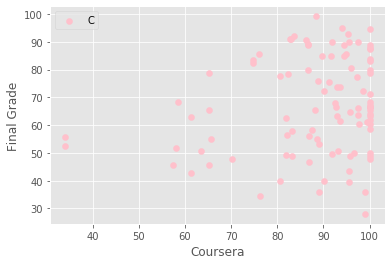

Text(0.5, 1.0, 'Linear Regression')

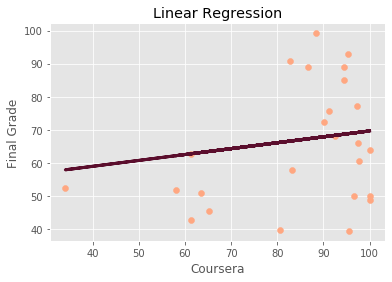

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

X = BackwardFill_DataFrame[['Coursera']]
y = BackwardFill_DataFrame["Final"]
train_X, val_X, train_y, val_y = train_test_split(X, y)
model = LinearRegression()
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)
mse = mean_squared_error(val_y, val_predictions)
print("The Mean square error is: ",mse)
print("R squared value is ", metrics.r2_score(val_y,val_predictions))

# Create visualisation of the model
plot = "Coursera"
plt.scatter(data[plot], data["Final"],color="pink")
plt.legend(plot)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

plt.scatter(val_X, val_y, color="#FFA781")
plt.plot(val_X, val_predictions, color="#5B0E2D", linewidth=3)
plt.xlabel('Coursera')
plt.ylabel('Final Grade')
plt.title('Linear Regression')

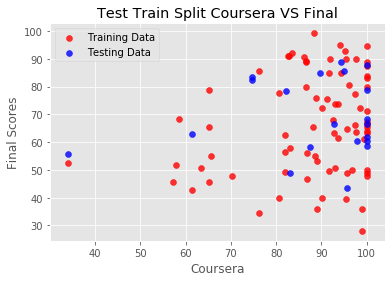

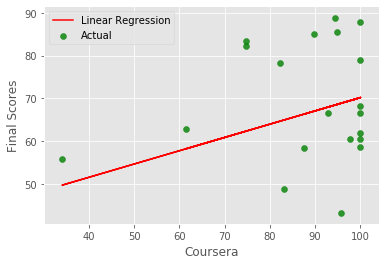

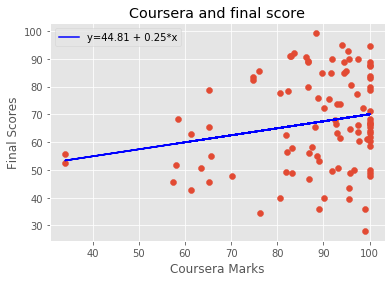

,Actual,Predicted
0,52.50,53.405633
1,68.33,70.031130
2,48.89,65.785839
3,80.56,69.037283
4,73.89,68.426849
...,...,...
94,61.94,70.031130
95,39.72,65.122433
96,87.78,70.031130
97,85.56,64.010031


In [31]:
X = BackwardFill_DataFrame[["Coursera"]]
y = BackwardFill_DataFrame["Final"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from matplotlib import pyplot as plt
plt.scatter(X_train,y_train,label='Training Data',color='r',alpha=0.8)
plt.scatter(X_test,y_test,label='Testing Data',color='b',alpha=0.8)
plt.xlabel("Coursera")
plt.ylabel("Final Scores")
plt.legend()
plt.title('Test Train Split Coursera VS Final')
plt.show()

LR=LinearRegression()
Model1=LR.fit(X_train.values.reshape(-1,1),y_train.values)
prediction=LR.predict(X_test.values.reshape(-1,1))
plt.plot(X_test,prediction,label='Linear Regression',color='r')
plt.scatter(X_test,y_test,label='Actual',color='g',alpha=0.8)
plt.xlabel("Coursera")
plt.ylabel("Final Scores")
plt.legend()
plt.show()


reg=LR.fit(X.values.reshape(-1,1),y.values)
reg.coef_
reg.intercept_
reg.score(X.values.reshape(-1,1),y.values)
Y_pred = reg.predict(X.values.reshape(-1,1))
plt.scatter(X, y)
plt.plot(X, Y_pred, color='blue',label = 'y={:.2f} + {:.2f}*x'.format(reg.intercept_,reg.coef_[0]))
plt.xlabel("Coursera Marks")
plt.ylabel("Final Scores")
plt.title("Coursera and final score")
plt.legend(loc='upper left')
plt.show()
df = pd.DataFrame({'Actual': y, 'Predicted':Y_pred})
df

### GROUP ACTIVITY

The Mean square error is:  244.92910012714063
R squared value is  -0.02975320332707021


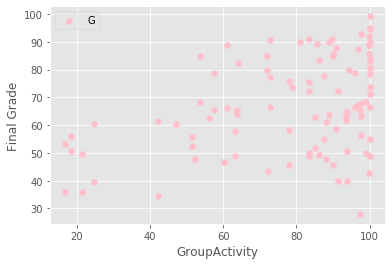

Text(0.5, 1.0, 'Linear Regression')

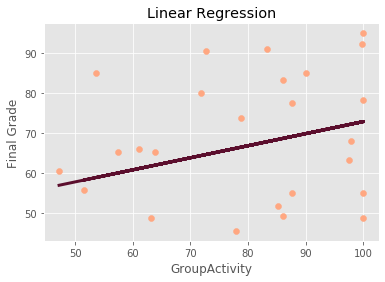

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

X = BackwardFill_DataFrame[['GroupActivity']]
y = BackwardFill_DataFrame["Final"]
train_X, val_X, train_y, val_y = train_test_split(X, y)
model = LinearRegression()
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)
mse = mean_squared_error(val_y, val_predictions)
print("The Mean square error is: ",mse)
print("R squared value is ", metrics.r2_score(val_y,val_predictions))

# Create visualisation of the model
plot = "GroupActivity"
plt.scatter(data[plot], data["Final"],color="pink")
plt.legend(plot)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

plt.scatter(val_X, val_y, color="#FFA781")
plt.plot(val_X, val_predictions, color="#5B0E2D", linewidth=3)
plt.xlabel('GroupActivity')
plt.ylabel('Final Grade')
plt.title('Linear Regression')

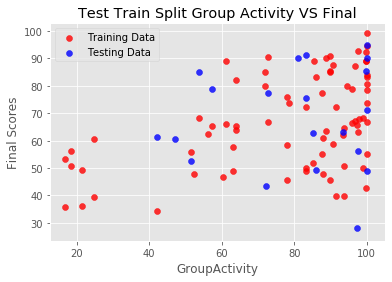

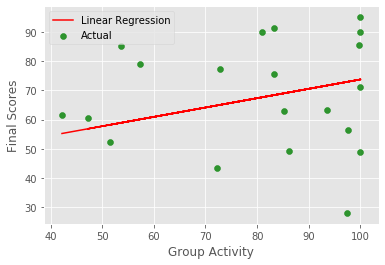

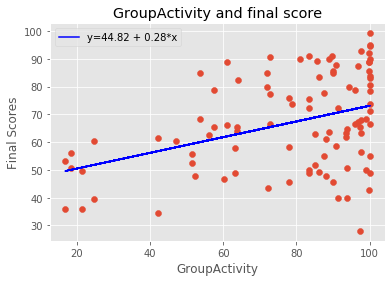

,Actual,Predicted
0,52.50,59.376225
1,68.33,72.831703
2,48.89,62.675772
3,80.56,73.094649
4,73.89,73.094649
...,...,...
94,61.94,71.262510
95,39.72,71.313402
96,87.78,70.476499
97,85.56,73.040929


In [33]:
X = BackwardFill_DataFrame[["GroupActivity"]]
y = BackwardFill_DataFrame["Final"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from matplotlib import pyplot as plt
plt.scatter(X_train,y_train,label='Training Data',color='r',alpha=0.8)
plt.scatter(X_test,y_test,label='Testing Data',color='b',alpha=0.8)
plt.xlabel("GroupActivity")
plt.ylabel("Final Scores")
plt.legend()
plt.title('Test Train Split Group Activity VS Final')
plt.show()

LR=LinearRegression()
Model1=LR.fit(X_train.values.reshape(-1,1),y_train.values)
prediction=LR.predict(X_test.values.reshape(-1,1))
plt.plot(X_test,prediction,label='Linear Regression',color='r')
plt.scatter(X_test,y_test,label='Actual',color='g',alpha=0.8)
plt.xlabel("Group Activity")
plt.ylabel("Final Scores")
plt.legend()
plt.show()

reg=LR.fit(X.values.reshape(-1,1),y.values)
reg.coef_
reg.intercept_
reg.score(X.values.reshape(-1,1),y.values)
Y_pred = reg.predict(X.values.reshape(-1,1))
plt.scatter(X, y)
plt.plot(X, Y_pred, color='blue',label = 'y={:.2f} + {:.2f}*x'.format(reg.intercept_,reg.coef_[0]))
plt.xlabel("GroupActivity")
plt.ylabel("Final Scores")
plt.title("GroupActivity and final score")
plt.legend(loc='upper left')
plt.show()
df = pd.DataFrame({'Actual': y, 'Predicted':Y_pred})
df

### Method 3 - KNN sklearn

In [34]:
import sklearn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
sklearn_Data = imputer.fit_transform(AcademicScoreDataset)
sklearn_DataFrame = pd.DataFrame(sklearn_Data, columns = ['Sem_enrolled','Tests','Coursera','GroupActivity','Final'])
sklearn_DataFrame 

,Sem_enrolled,Tests,Coursera,GroupActivity,Final
0,5.0,95.050000,34.09,51.48,52.50
1,1.0,83.700000,100.00,99.07,68.33
2,1.0,81.220000,83.17,63.15,48.89
3,2.0,91.320000,96.06,100.00,80.56
4,1.0,95.000000,93.64,100.00,73.89
...,...,...,...,...,...
94,2.0,89.940000,80.54,93.70,39.72
95,1.0,95.600000,100.00,90.74,87.78
96,2.0,63.400000,76.13,99.81,85.56
97,1.0,75.350000,97.37,72.78,77.22


In [35]:
style.use("ggplot")

# Import dataset with student's data
data = sklearn_DataFrame

# Select the value we want to predict
predict = "Final"

# List the variables we want to use for our predictions in this model
data = data[[ 'Tests','Coursera','GroupActivity','Final']]
data = shuffle(data)

x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

# Train model multiple times to find the highest accuracy
best = 0
for _ in range(10):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
print("Highest Accuracy:", best)

# Load model
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

predictions = linear.predict(x_test)

# Print the predictions, the variables we used and the actual final grade
for x in range(len(predictions)):
   print("Predicted Final grade: ", predictions[x])
   print("Data:", x_test[x])
   print("Final grade:", y_test[x])
   print("")

Accuracy: -0.6259646078727692
Accuracy: 0.006196324273112563
Accuracy: 0.049733756546105456
Accuracy: -0.5137057494880457
Accuracy: 0.3377942577631585
Accuracy: -0.20401729633383314
Accuracy: 0.002508683254307642
Accuracy: -0.01877301536513798
Accuracy: -0.3096551331775499
Accuracy: 0.057600871437630485
Highest Accuracy: 0.3377942577631585
-------------------------
Coefficient: 
 [-0.01062128  0.1892344   0.24891728]
Intercept: 
 31.233793091725204
-------------------------
Predicted Final grade:  72.52955655692926
Data: [ 85.34 100.    93.52]
Final grade: 61.94

Predicted Final grade:  55.3102579847112
Data: [80.44 76.21 42.22]
Final grade: 34.44

Predicted Final grade:  62.44519894648195
Data: [90.74 57.97 85.19]
Final grade: 51.67

Predicted Final grade:  64.8644261329282
Data: [75.27 86.21 72.78]
Final grade: 90.55

Predicted Final grade:  65.02859390823967
Data: [ 97.16 100.    63.89]
Final grade: 65.28

Predicted Final grade:  69.59140005865753
Data: [95.9  98.47 83.33]
Final gra

### Final Interpretation of Method 3

### TESTS

The Mean square error is:  304.7705788113988
R squared value is  0.048929197663077906


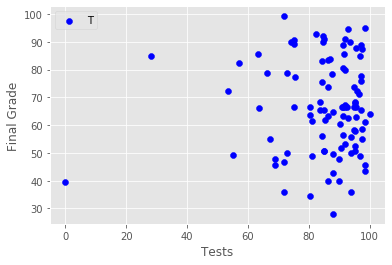

Text(0.5, 1.0, 'Linear Regression')

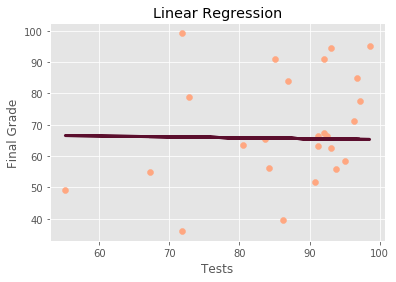

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

X = sklearn_DataFrame [['Tests']]
y = sklearn_DataFrame ["Final"]
train_X, val_X, train_y, val_y = train_test_split(X, y)
model = LinearRegression()
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)
mse = mean_squared_error(val_y, val_predictions)
print("The Mean square error is: ",mse)
print("R squared value is ", -1*metrics.r2_score(val_y,val_predictions))

# Create visualisation of the model
plot = "Tests"
plt.scatter(data[plot], data["Final"],color="blue")
plt.legend(plot)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

plt.scatter(val_X, val_y, color="#FFA781")
plt.plot(val_X, val_predictions, color="#5B0E2D", linewidth=3)
plt.xlabel('Tests')
plt.ylabel('Final Grade')
plt.title('Linear Regression')

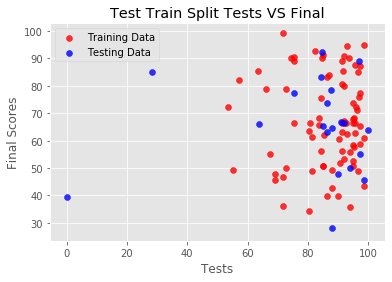

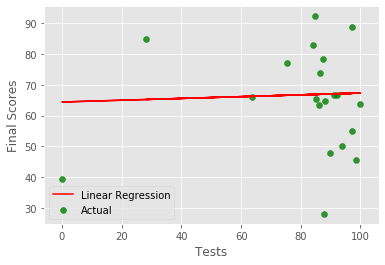

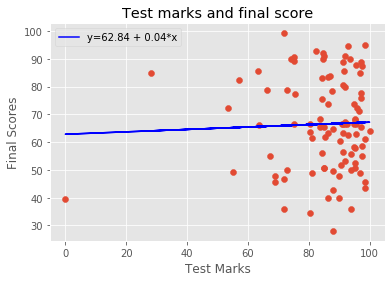

,Actual,Predicted
0,52.50,66.951942
1,68.33,66.460401
2,48.89,66.352998
3,80.56,66.790405
4,73.89,66.949776
...,...,...
94,39.72,66.730640
95,87.78,66.975761
96,85.56,65.581258
97,77.22,66.098783


In [37]:
X = sklearn_DataFrame [["Tests"]]
y = sklearn_DataFrame ["Final"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from matplotlib import pyplot as plt
plt.scatter(X_train,y_train,label='Training Data',color='r',alpha=0.8)
plt.scatter(X_test,y_test,label='Testing Data',color='b',alpha=0.8)
plt.xlabel("Tests")
plt.ylabel("Final Scores")
plt.legend()
plt.title('Test Train Split Tests VS Final')
plt.show()

LR=LinearRegression()
Model1=LR.fit(X_train.values.reshape(-1,1),y_train.values)
prediction=LR.predict(X_test.values.reshape(-1,1))
plt.plot(X_test,prediction,label='Linear Regression',color='r')
plt.scatter(X_test,y_test,label='Actual',color='g',alpha=0.8)
plt.xlabel("Tests")
plt.ylabel("Final Scores")
plt.legend()
plt.show()

reg=LR.fit(X.values.reshape(-1,1),y.values)
reg.coef_
reg.intercept_
reg.score(X.values.reshape(-1,1),y.values)
Y_pred = reg.predict(X.values.reshape(-1,1))
plt.scatter(X, y)
plt.plot(X, Y_pred, color='blue',label = 'y={:.2f} + {:.2f}*x'.format(reg.intercept_,reg.coef_[0]))
plt.xlabel("Test Marks")
plt.ylabel("Final Scores")
plt.title("Test marks and final score")
plt.legend(loc='upper left')
plt.show()
df = pd.DataFrame({'Actual': y, 'Predicted':Y_pred})
df

### COURSERA

The Mean square error is:  265.2622818231509
R squared value is  -0.10484392988177471


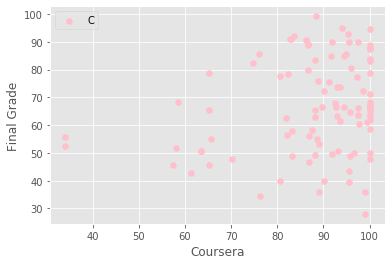

Text(0.5, 1.0, 'Linear Regression')

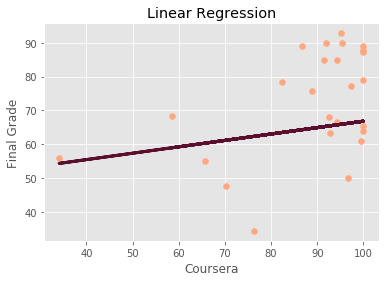

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

X = sklearn_DataFrame [['Coursera']]
y = sklearn_DataFrame ["Final"]
train_X, val_X, train_y, val_y = train_test_split(X, y)
model = LinearRegression()
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)
mse = mean_squared_error(val_y, val_predictions)
print("The Mean square error is: ",mse)
print("R squared value is ", metrics.r2_score(val_y,val_predictions))

# Create visualisation of the model
plot = "Coursera"
plt.scatter(data[plot], data["Final"],color="pink")
plt.legend(plot)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

plt.scatter(val_X, val_y, color="#FFA781")
plt.plot(val_X, val_predictions, color="#5B0E2D", linewidth=3)
plt.xlabel('Coursera')
plt.ylabel('Final Grade')
plt.title('Linear Regression')

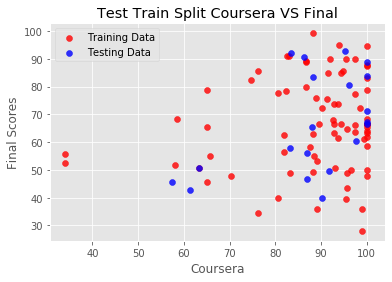

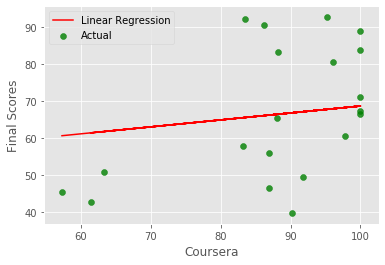

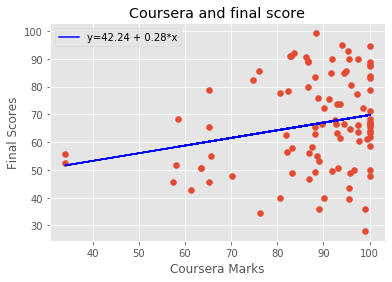

,Actual,Predicted
0,52.50,51.626970
1,68.33,69.771856
2,48.89,65.138592
3,80.56,68.687183
4,73.89,68.020962
...,...,...
94,39.72,64.414559
95,87.78,69.771856
96,85.56,63.200495
97,77.22,69.047823


In [39]:
X = sklearn_DataFrame [["Coursera"]]
y =sklearn_DataFrame ["Final"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from matplotlib import pyplot as plt
plt.scatter(X_train,y_train,label='Training Data',color='r',alpha=0.8)
plt.scatter(X_test,y_test,label='Testing Data',color='b',alpha=0.8)
plt.xlabel("Coursera")
plt.ylabel("Final Scores")
plt.legend()
plt.title('Test Train Split Coursera VS Final')
plt.show()

LR=LinearRegression()
Model1=LR.fit(X_train.values.reshape(-1,1),y_train.values)
prediction=LR.predict(X_test.values.reshape(-1,1))
plt.plot(X_test,prediction,label='Linear Regression',color='r')
plt.scatter(X_test,y_test,label='Actual',color='g',alpha=0.8)
plt.xlabel("Coursera")
plt.ylabel("Final Scores")
plt.legend()
plt.show()


reg=LR.fit(X.values.reshape(-1,1),y.values)
reg.coef_
reg.intercept_
reg.score(X.values.reshape(-1,1),y.values)
Y_pred = reg.predict(X.values.reshape(-1,1))
plt.scatter(X, y)
plt.plot(X, Y_pred, color='blue',label = 'y={:.2f} + {:.2f}*x'.format(reg.intercept_,reg.coef_[0]))
plt.xlabel("Coursera Marks")
plt.ylabel("Final Scores")
plt.title("Coursera and final score")
plt.legend(loc='upper left')
plt.show()
df = pd.DataFrame({'Actual': y, 'Predicted':Y_pred})
df

### GROUP ACTIVITY

The Mean square error is:  219.02240496701842
R squared value is  0.24266517384488495


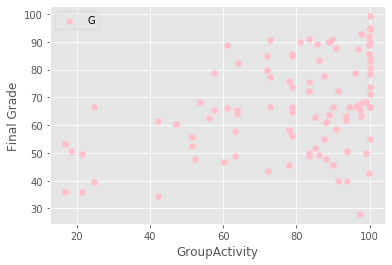

Text(0.5, 1.0, 'Linear Regression')

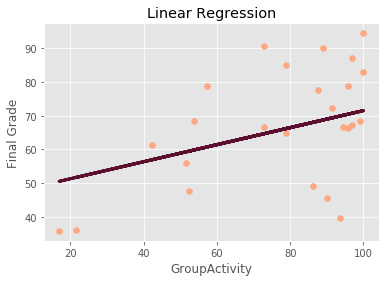

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

X = sklearn_DataFrame [['GroupActivity']]
y = sklearn_DataFrame ["Final"]
train_X, val_X, train_y, val_y = train_test_split(X, y)
model = LinearRegression()
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)
mse = mean_squared_error(val_y, val_predictions)
print("The Mean square error is: ",mse)
print("R squared value is ", metrics.r2_score(val_y,val_predictions))

# Create visualisation of the model
plot = "GroupActivity"
plt.scatter(data[plot], data["Final"],color="pink")
plt.legend(plot)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

plt.scatter(val_X, val_y, color="#FFA781")
plt.plot(val_X, val_predictions, color="#5B0E2D", linewidth=3)
plt.xlabel('GroupActivity')
plt.ylabel('Final Grade')
plt.title('Linear Regression')

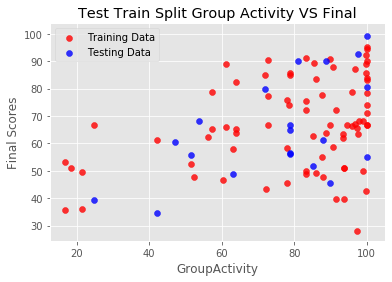

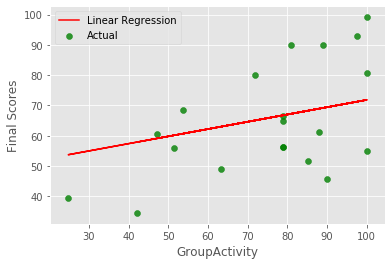

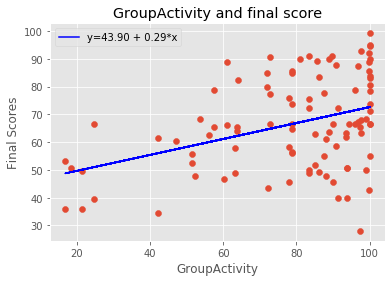

,Actual,Predicted
0,52.50,58.683343
1,68.33,72.345785
2,48.89,62.033641
3,80.56,72.612775
4,73.89,72.612775
...,...,...
94,39.72,70.804131
95,87.78,69.954355
96,85.56,72.558229
97,77.22,64.798283


In [41]:
X = sklearn_DataFrame [["GroupActivity"]]
y = sklearn_DataFrame ["Final"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from matplotlib import pyplot as plt
plt.scatter(X_train,y_train,label='Training Data',color='r',alpha=0.8)
plt.scatter(X_test,y_test,label='Testing Data',color='b',alpha=0.8)
plt.xlabel("GroupActivity")
plt.ylabel("Final Scores")
plt.legend()
plt.title('Test Train Split Group Activity VS Final')
plt.show()

LR=LinearRegression()
Model1=LR.fit(X_train.values.reshape(-1,1),y_train.values)
prediction=LR.predict(X_test.values.reshape(-1,1))
plt.plot(X_test,prediction,label='Linear Regression',color='r')
plt.scatter(X_test,y_test,label='Actual',color='g',alpha=0.8)
plt.xlabel("GroupActivity")
plt.ylabel("Final Scores")
plt.legend()
plt.show()

reg=LR.fit(X.values.reshape(-1,1),y.values)
reg.coef_
reg.intercept_
reg.score(X.values.reshape(-1,1),y.values)
Y_pred = reg.predict(X.values.reshape(-1,1))
plt.scatter(X, y)
plt.plot(X, Y_pred, color='blue',label = 'y={:.2f} + {:.2f}*x'.format(reg.intercept_,reg.coef_[0]))
plt.xlabel("GroupActivity")
plt.ylabel("Final Scores")
plt.title("GroupActivity and final score")
plt.legend(loc='upper left')
plt.show()
df = pd.DataFrame({'Actual': y, 'Predicted':Y_pred})
df

### R-squared is a goodness-of-fit measure for linear regression models.

### HOW TO CONCLUDE ON R squared Values:
    
* The negative R-squared value means that your prediction tends to be less accurate that the average value of the data set over time
* R-squared is always between 0 and 100%:

    -> 0% represents a model that does not explain any of the variation in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
    
    -> 100% represents a model that explains all of the variation in the response variable around its mean.
    
Usually, the larger the R2, the better the regression model fits your observations.

### HOW TO CONCLUDE ON MSE VALUES:
    
* The value which is Less fits good model

## METHOD 1 : Replacing Null by Zero

* TESTS:
    
   -  MSE: 472.97
     
   -  R2 value: -0.124
    
    
* COURSERA:
     
   - MSE: 615.838
     
   - R2 value: -0.044
     
    
* GROUP ACTIVITY:
     
   - MSE: 712.452
     
   - R2 value: -0.040
     

## METHOD 2A : Forward Fill Imputation

* TESTS:
     
    - MSE: 281.900
    
    - R2 value: -0.120
    
    
* COURSERA:
    
    - MSE: 391.394
    
    - R2 value: -0.010
    
    
* GROUP ACTIVITY:
    
    - MSE: 248.664
    
    - R2 value: 0.166

## METHOD 2B : Backward Fill Imputation

* TESTS:
    
    - MSE: 463.490
    
    - R2 value: -0.225
        
        
* COURSERA:
    
    - MSE: 295.907
    
    - R2 value: 0.070
    
    
* GROUP ACTIVITY:
    
    - MSE: 244.929
    
    - R2 value: -0.029

## METHOD 3 : KNN sklearn

* TESTS:
    
    - MSE: 304.770
    
    - R2 value: 0.048
    
        
* COURSERA:
    
    - MSE: 265.262
    
    - R2 value: -0.104
    
    
* GROUP ACTIVITY:
    
    - MSE: 219.022
    
    - R2 value: 0.242